##**AIM** : Investigate the relationship between major stock market indices and the US Dollar

In [ ]:
import pandas as pd

##Importing the Nifty IT dataset

In [ ]:
df=pd.read_csv('/content/NIFTY IT-01-07-2022-to-01-07-2023.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,01-Jul-22,27718.80,28151.00,27524.30,28064.25,17362585,2460.19
1,04-Jul-22,28084.25,28174.40,27643.65,27890.65,16524407,2554.89
2,05-Jul-22,28020.30,28233.05,27642.60,27695.15,22705381,3158.56
3,06-Jul-22,27778.65,28148.90,27628.55,28007.60,19427285,2706.18
4,07-Jul-22,28217.80,28459.25,28077.05,28196.35,17533750,2507.99


##Columns

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

##Splitting the column of Dates into Month,Year and Date

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

<ipython-input-5-0dda9b1f1541>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


##Plotting the date vs Turnover graph

The value of turnover has spiked the highest between March 2023 and May 2023

<Axes: xlabel='Date'>

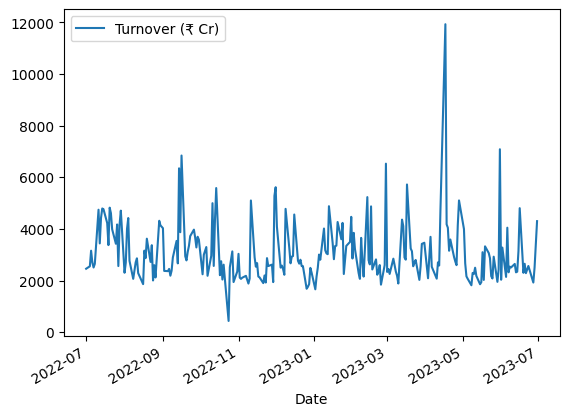

In [ ]:

df.plot(x='Date', y='Turnover (₹ Cr)', kind='line')


In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Year,Month
0,2022-07-01,27718.80,28151.00,27524.30,28064.25,17362585,2460.19,2022,7
1,2022-07-04,28084.25,28174.40,27643.65,27890.65,16524407,2554.89,2022,7
2,2022-07-05,28020.30,28233.05,27642.60,27695.15,22705381,3158.56,2022,7
3,2022-07-06,27778.65,28148.90,27628.55,28007.60,19427285,2706.18,2022,7
4,2022-07-07,28217.80,28459.25,28077.05,28196.35,17533750,2507.99,2022,7
5,2022-07-08,28450.55,28459.55,28095.35,28250.30,18446136,2649.36,2022,7
6,2022-07-11,27855.75,27941.20,27195.65,27380.55,30951187,4745.70,2022,7
7,2022-07-12,27248.20,27504.40,27022.85,27063.75,22932784,3441.23,2022,7
8,2022-07-13,27228.95,27247.45,26872.75,26949.75,32810008,4427.91,2022,7
9,2022-07-14,27155.00,27162.90,26298.00,26523.30,29820417,4793.39,2022,7


##Splitting the dataset into Training and Testing by first finding the splitting column

In [ ]:
df.sort_values('Date', inplace=True)
train_ratio=0.8
split_index=int(len(df)*train_ratio)
train_data=df[:split_index]
test_data=df[:split_index:]
print(split_index)

197


In [ ]:
features = ['Open','High','Low',	'Close'	,'Shares Traded ']
X_train = train_data[features]
y_train = train_data['Turnover (₹ Cr)']
X_test = test_data[features]
y_test = test_data['Turnover (₹ Cr)']


##Applying RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)



print(f'Predicted Turnover in Crores: {predictions[0]}')


Predicted Turnover in Crores: 2414.9891000000016


##Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model,open(filename,'wb'))


##Load the saved model

In [ ]:
load_model=pickle.load(open('/content/trained_model.sav','rb'))

In [14]:
pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
